# Merging and Analysing NYC Businesss Data and License Application Data

In [1]:
import pymongo
from pymongo import MongoClient
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import warnings
warnings.filterwarnings('ignore')

## 1. Credentials Of the Host System and The Mongo Data Base

In [5]:
HOST = '87.44.4.77'
USER_NAME = 'dap_project'
USER_PASSWORD = 'Dap_12345'
PORT = 27017
MONGO_DB_NAME = 'newyork_businesses_db'

## 2. Fetching Preprocessed data of New York Business Data From Mongo DB Hosted in NCI Private Cloud

In [15]:
client = MongoClient(f'mongodb://{USER_NAME}:{USER_PASSWORD}@{HOST}:{PORT}/{MONGO_DB_NAME}')
db = client[MONGO_DB_NAME]
newyork_businesses_collection = db['preprocessed_newyork_business']
nyc_licensed_business_documents = newyork_businesses_collection.find()
#     client1.close()
newyork_licensed_businesses_df = pd.DataFrame(list(nyc_licensed_business_documents))

## 3. Fetching Preprocessed data of New York Business Application Data From Mongo DB Hosted in NCI Private Cloud

In [17]:
client = MongoClient(f'mongodb://{USER_NAME}:{USER_PASSWORD}@{HOST}:{PORT}/{MONGO_DB_NAME}')
db = client[MONGO_DB_NAME]
nyc_license_application_collection = db['LICENSE_APPLICATIONS_Pre_Processed']
nyc_license_application_documents = nyc_license_application_collection.find()
nyc_license_application_df = pd.DataFrame(list(nyc_license_application_documents))

## 4. Combining both the Datasets

In [19]:
newyork_licensed_businesses_df.columns

Index(['_id', 'license_number', 'license_type', 'license_expiry_date',
       'license_status', 'license_creation_date', 'industry', 'business_name',
       'address_city', 'address_state', 'address_zip', 'address_building',
       'address_street_name', 'address_borough', 'longitude', 'latitude',
       'city_has_state'],
      dtype='object')

In [20]:
nyc_license_application_df.columns

Index(['_id', 'application_id', 'license_number', 'license_type',
       'application_or_renewal', 'business_name', 'status', 'start_date',
       'end_date', 'license_category', 'application_category', 'city', 'state',
       'zip', 'contact_phone', 'longitude', 'latitude', 'street_2',
       'temp_op_letter_issued', 'temp_op_letter_expiration'],
      dtype='object')

In [21]:
newyork_licensed_businesses_df.head()

,_id,license_number,license_type,license_expiry_date,license_status,license_creation_date,industry,business_name,address_city,address_state,address_zip,address_building,address_street_name,address_borough,longitude,latitude,city_has_state
0,64459f86b29664cd5dc2e1a9,2103411-DCA,Individual,1711843200000,Active,1641859200000,Sightseeing Guide,"Nieciak, Joseph",Brooklyn,NY,11214,unlnown,86TH ST,Brooklyn,-73.997539,40.602482,True
1,64459f86b29664cd5dc2e1aa,2060087-DCA,Individual,1711843200000,Active,1509408000000,Sightseeing Guide,"Arcaro, Tyler",New York,NY,10028,unlnown,2ND AVE,Manhattan,-73.953305,40.776661,True
2,64459f86b29664cd5dc2e1ab,2105486-DCA,Individual,1682812800000,Active,1650585600000,Pedicab Driver,"RADZHABOV, ABDURAKHIM",Brooklyn,NY,11214,unlnown,86TH ST,Brooklyn,-73.997539,40.602482,True
3,64459f86b29664cd5dc2e1ac,2078026-DCA,Individual,1711843200000,Active,1536624000000,Sightseeing Guide,"HESSE, DAPHNEE",Vancouver,British Columbia,V6Z1C,unlnown,unknown,Unknown,-74.003890,40.674315,True
4,64459f86b29664cd5dc2e1ad,2029953-DCA,Individual,1477872000000,Inactive,1446076800000,Tow Truck Driver,"Rodriguez, Juan",Bronx,NY,10460,unlnown,E TREMONT AVE,Bronx,-73.883813,40.840340,True


In [25]:
nyc_license_application_df.head()

,_id,application_id,license_number,license_type,application_or_renewal,business_name,status,start_date,end_date,license_category,application_category,city,state,zip,contact_phone,longitude,latitude,street_2,temp_op_letter_issued,temp_op_letter_expiration
0,64459dd6c3aba81a34826272,1066-2017-RHIC,1294131-DCA,Business,Renewal,PEYKO TZENOV,Issued,2017-01-09T00:00:00.000,2017-01-10,Home Improvement Contractor,Special,Bronx,NY,10467,9178047161,-73.877091,40.876214,NaN,NaN,NaN
1,64459dd6c3aba81a34826273,7066-2014-ASLS,2009515-DCA,Business,Application,7TH AVE GOURMET INC.,Issued,2014-06-02T00:00:00.000,2014-06-13,Stoop Line Stand,Basic,New York,NY,10011,718-783-3806,-73.975088,40.674997,NaN,NaN,NaN
2,64459dd6c3aba81a34826274,1164-2019-RDPD,1472251-DCA,Business,Renewal,AMERICAN EAST PHARMACY INC.,Issued,2019-01-09T00:00:00.000,2019-01-10,Dealer In Products,Basic,New York,NY,10002,2129251900,-73.996169,40.7141181,NaN,NaN,NaN
3,64459dd6c3aba81a34826275,33701-2016-RELE,2025971-DCA,Business,Renewal,LUCAS ELECTRONICS INC,Issued,2016-12-31T00:00:00.000,2017-01-10,Electronics Store,Basic,Brooklyn,NY,11222,347-987-3235,-73.954098,40.7298694,NaN,NaN,NaN
4,64459dd6c3aba81a34826276,34278-2018-RELE,2047043-DCA,Business,Renewal,ELITE WIRELESS GROUP NY LLC,Issued,2018-12-31T00:00:00.000,2019-01-08,Electronics Store,Basic,Brooklyn,NY,11226,718-484-7746,-73.949327,40.6508262,NaN,NaN,NaN


In [22]:
nyc_license_application_df[nyc_license_application_df['license_number'] == '2103411-DCA']

,_id,application_id,license_number,license_type,application_or_renewal,business_name,status,start_date,end_date,license_category,application_category,city,state,zip,contact_phone,longitude,latitude,street_2,temp_op_letter_issued,temp_op_letter_expiration
158441,64459ddbc3aba81a3488ae8d,7153-2021-ASSG,2103411-DCA,Individual,Application,Joseph Nieciak,Issued,2022-01-11T00:00:00.000,2022-01-12,Sightseeing Guide,Basic,Brooklyn,NY,11214,NaN,-73.959814,40.646867,NaN,NaN,NaN


In [23]:
# Merging both the dataset on the License Number Column
business_license_merged_df = pd.merge(newyork_licensed_businesses_df, nyc_license_application_df, on = 'license_number')

In [24]:
business_license_merged_df.shape

(87564, 36)

In [26]:
business_license_merged_df.columns

Index(['_id_x', 'license_number', 'license_type_x', 'license_expiry_date',
       'license_status', 'license_creation_date', 'industry',
       'business_name_x', 'address_city', 'address_state', 'address_zip',
       'address_building', 'address_street_name', 'address_borough',
       'longitude_x', 'latitude_x', 'city_has_state', '_id_y',
       'application_id', 'license_type_y', 'application_or_renewal',
       'business_name_y', 'status', 'start_date', 'end_date',
       'license_category', 'application_category', 'city', 'state', 'zip',
       'contact_phone', 'longitude_y', 'latitude_y', 'street_2',
       'temp_op_letter_issued', 'temp_op_letter_expiration'],
      dtype='object')

In [27]:
business_license_merged_df.head()

,_id_x,license_number,license_type_x,license_expiry_date,license_status,license_creation_date,industry,business_name_x,address_city,address_state,...,application_category,city,state,zip,contact_phone,longitude_y,latitude_y,street_2,temp_op_letter_issued,temp_op_letter_expiration
0,64459f86b29664cd5dc2e1a9,2103411-DCA,Individual,1711843200000,Active,1641859200000,Sightseeing Guide,"Nieciak, Joseph",Brooklyn,NY,...,Basic,Brooklyn,NY,11214,NaN,-73.959814,40.646867,NaN,NaN,NaN
1,64459f86b29664cd5dc2e1aa,2060087-DCA,Individual,1711843200000,Active,1509408000000,Sightseeing Guide,"Arcaro, Tyler",New York,NY,...,Basic,New York,NY,10028,NaN,-73.979877,40.757966,NaN,NaN,NaN
2,64459f86b29664cd5dc2e1ab,2105486-DCA,Individual,1682812800000,Active,1650585600000,Pedicab Driver,"RADZHABOV, ABDURAKHIM",Brooklyn,NY,...,Basic,Brooklyn,NY,11214,NaN,-73.959814,40.646867,NaN,NaN,NaN
3,64459f86b29664cd5dc2e1ac,2078026-DCA,Individual,1711843200000,Active,1536624000000,Sightseeing Guide,"HESSE, DAPHNEE",Vancouver,British Columbia,...,Basic,New York,NY,10028,NaN,-73.979877,40.757966,NaN,NaN,NaN
4,64459f86b29664cd5dc2e1ad,2029953-DCA,Individual,1477872000000,Inactive,1446076800000,Tow Truck Driver,"Rodriguez, Juan",Bronx,NY,...,Basic,Bronx,NY,10460,NaN,-73.888558,40.846316,NaN,NaN,NaN


## 5. Visualizations for understanding the data

### Distribution of Industry Types

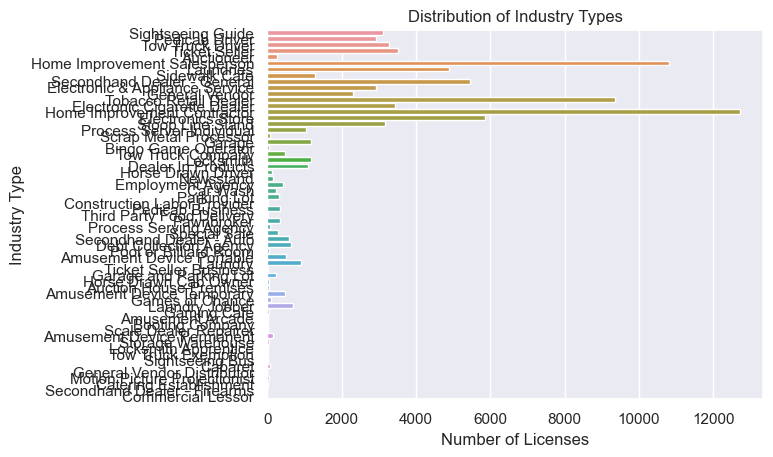

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
sns.countplot(y="industry", data=business_license_merged_df)
plt.title("Distribution of Industry Types")
plt.xlabel("Number of Licenses")
plt.ylabel("Industry Type")
plt.show()


### Geographical Distribution of Businesses

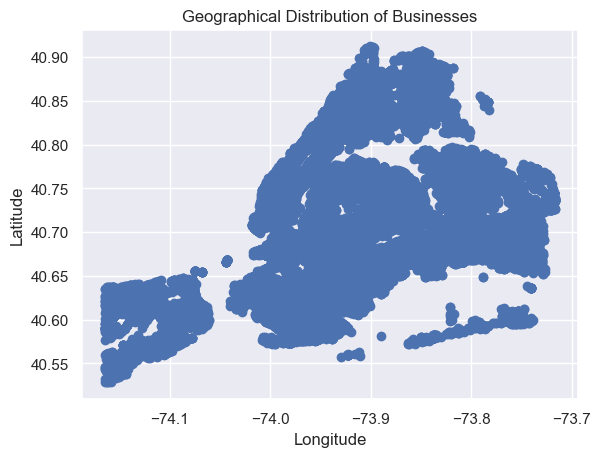

In [29]:
plt.scatter(x="longitude_x", y="latitude_x", data=business_license_merged_df)
plt.title("Geographical Distribution of Businesses")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


### Correlation between License Creation Date and Expiry Date

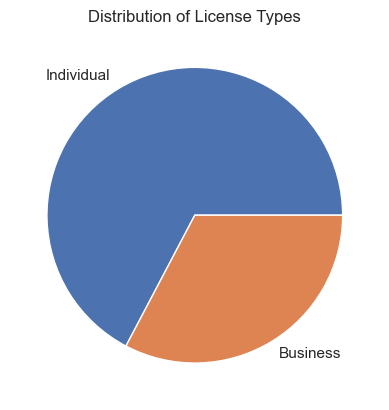

In [30]:
plt.pie(x=business_license_merged_df["license_type_x"].value_counts(), labels=business_license_merged_df["license_type_x"].unique())
plt.title("Distribution of License Types")
plt.show()


### Correlation between License Creation Date and Expiry Date

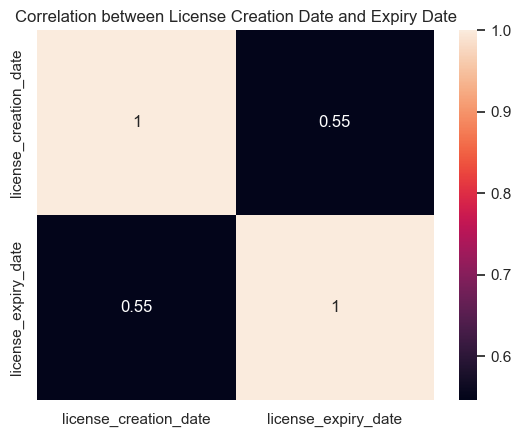

In [31]:
sns.heatmap(data=business_license_merged_df[["license_creation_date", "license_expiry_date"]].corr(), annot=True)
plt.title("Correlation between License Creation Date and Expiry Date")
plt.show()


### Relationship between License Creation Date and Latitude

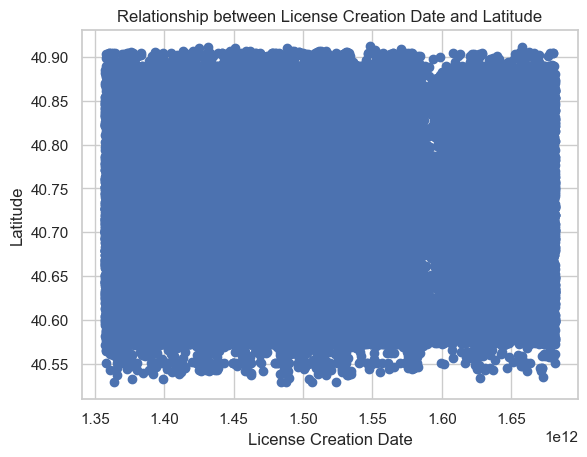

In [33]:
plt.scatter(x="license_creation_date", y="latitude_x", data=business_license_merged_df)
plt.title("Relationship between License Creation Date and Latitude")
plt.xlabel("License Creation Date")
plt.ylabel("Latitude")
plt.show()


### Distribution of License Expiry Dates by License Type

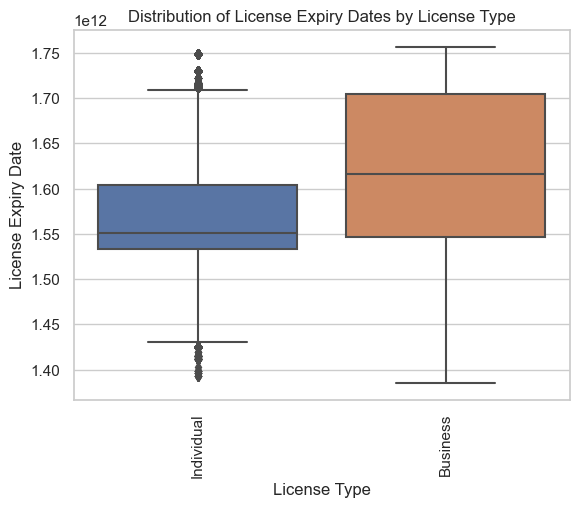

In [34]:
sns.boxplot(x="license_type_x", y="license_expiry_date", data=business_license_merged_df)
plt.xticks(rotation=90)
plt.title("Distribution of License Expiry Dates by License Type")
plt.xlabel("License Type")
plt.ylabel("License Expiry Date")
plt.show()


### Number of License Applications Over Time

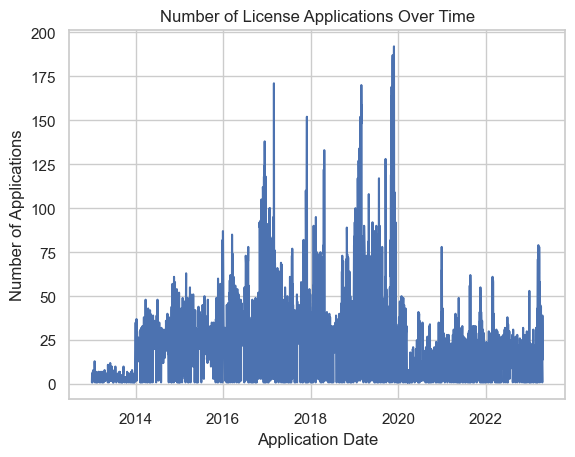

In [39]:
business_license_merged_df["application_date"] = pd.to_datetime(business_license_merged_df["start_date"])
application_counts = business_license_merged_df.groupby("application_date")["application_id"].count().reset_index()
sns.lineplot(x="application_date", y="application_id", data=application_counts)
plt.title("Number of License Applications Over Time")
plt.xlabel("Application Date")
plt.ylabel("Number of Applications")
plt.show()


### Distribution of License Types by License Status

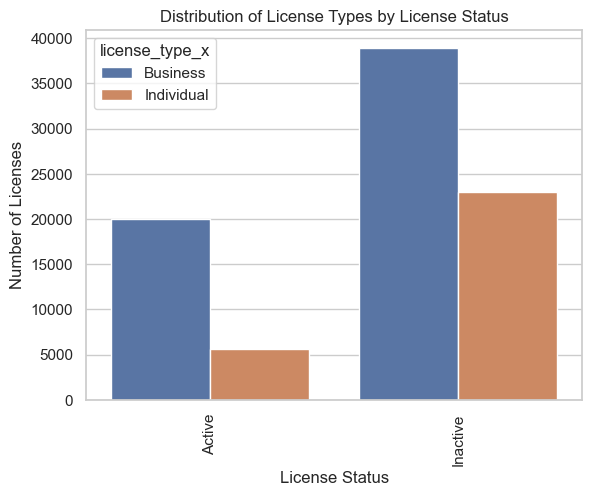

In [49]:
license_status_counts = business_license_merged_df.groupby(["license_status", "license_type_x"])["license_number"].count().reset_index()
sns.set(style="whitegrid")
sns.barplot(x="license_status", y="license_number", hue="license_type_x", data=license_status_counts)
plt.xticks(rotation=90)
plt.title("Distribution of License Types by License Status")
plt.xlabel("License Status")
plt.ylabel("Number of Licenses")
plt.show()


### Distribution of License Expiry Dates

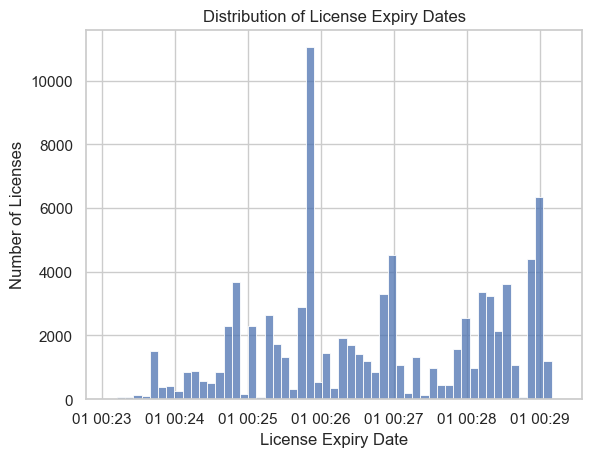

In [50]:
business_license_merged_df["license_expiry_date"] = pd.to_datetime(business_license_merged_df["license_expiry_date"])
sns.histplot(x="license_expiry_date", data=business_license_merged_df)
plt.title("Distribution of License Expiry Dates")
plt.xlabel("License Expiry Date")
plt.ylabel("Number of Licenses")
plt.show()


### Distribution of Application Categories by Top 10 Street Names

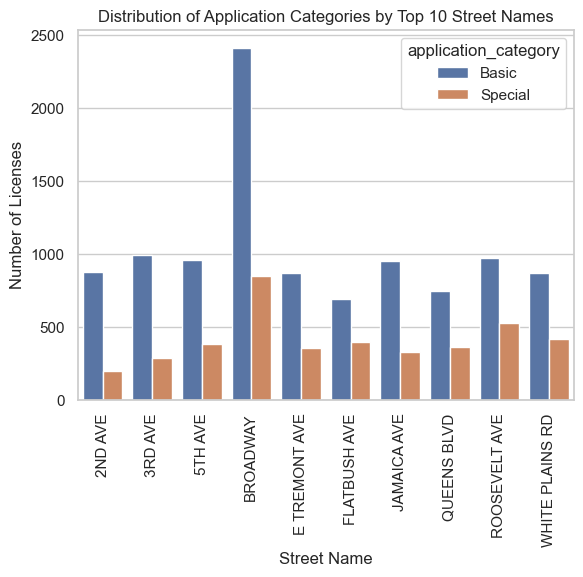

In [56]:
top_street_names = business_license_merged_df["address_street_name"].value_counts().nlargest(10).index.tolist()
top_street_names_df = business_license_merged_df.loc[business_license_merged_df["address_street_name"].isin(top_street_names)]

street_app_category_counts = top_street_names_df.groupby(["address_street_name", "application_category"])["license_number"].count().reset_index()

sns.set(style="whitegrid")
sns.barplot(x="address_street_name", y="license_number", hue="application_category", data=street_app_category_counts)
plt.xticks(rotation=90)
plt.title("Distribution of Application Categories by Top 10 Street Names")
plt.xlabel("Street Name")
plt.ylabel("Number of Licenses")
plt.show()


## 6. Storing preprocessed data back to Mongo DB

In [64]:
client = MongoClient(f'mongodb://{USER_NAME}:{USER_PASSWORD}@{HOST}:{PORT}/{MONGO_DB_NAME}')
db = client[MONGO_DB_NAME]
nyc_business_license_collection = db['nyc_business_license_merged']
nyc_business_license_collection.drop()

nyc_business_license_collection.insert_many(business_license_merged_df.to_dict(orient='records'))